####Linear Regression Practice

In [1]:
import pandas as pd

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sklearn.feature_selection as feature_selection
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
loan_data = pd.read_csv('LoansData.csv')

In [3]:
loan_data

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [4]:
loan_data.shape

(2500, 15)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [6]:
profile = pandas_profiling.ProfileReport(loan_data)

NameError: name 'pandas_profiling' is not defined

In [ ]:
#profile.to_file('profile.html')

In [13]:
loan_data.columns = [i.replace('.','_') for i in loan_data.columns]
loan_data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [14]:
loan_data['Interest_Rate'] = loan_data['Interest_Rate'].apply(lambda x:float(str(x).replace('%','')))

In [15]:
loan_data

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.00,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.00,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.00,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.00,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [16]:
loan_data['Loan_Length'] = loan_data['Loan_Length'].apply(lambda x: float(str(x).replace('months','')))

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   object 
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [18]:
loan_data['Debt_To_Income_Ratio'] = loan_data['Debt_To_Income_Ratio'].apply(lambda x: float(str(x).replace('%','')))

In [19]:
loan_data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [20]:
loan_data[['fico_low','fico_high']] = loan_data['FICO_Range'].str.split('-',expand = True)

In [21]:
loan_data

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,fico_low,fico_high
0,1,20000.0,20000.00,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735,739
1,2,19200.0,19200.00,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715,719
2,3,35000.0,35000.00,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690,694
3,4,10000.0,9975.00,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695,699
4,5,12000.0,12000.00,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years,705,709
2496,2497,16000.0,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years,740,744
2497,2498,10000.0,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years,680,684
2498,2499,6000.0,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years,675,679


In [22]:
loan_data.Employment_Length.value_counts()

10+ years    653
< 1 year     250
2 years      244
3 years      235
5 years      202
4 years      192
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
Name: Employment_Length, dtype: int64

In [23]:
loan_data['fico_avg'] = (loan_data.fico_low.astype('float') + loan_data.fico_high.astype('float'))/2

In [24]:
loan_data.drop(['FICO_Range','fico_low','fico_high','LoanID'], axis=1, inplace = True)

In [25]:
loan_data['Employment_Length'] = loan_data['Employment_Length'].apply(lambda x: str(x).replace('< ',''))
loan_data['Employment_Length'] = loan_data['Employment_Length'].apply(lambda x: str(x).replace('+',''))
loan_data['Employment_Length'] = loan_data['Employment_Length'].apply(lambda x: str(x).replace(' years',''))
loan_data['Employment_Length'] = loan_data['Employment_Length'].apply(lambda x: float(str(x).replace(' year','')))

In [26]:
loan_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'fico_avg'],
      dtype='object')

In [27]:
cat_var = ['Loan_Purpose','Home_Ownership','State']
num_var =[ 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length',  'Debt_To_Income_Ratio',
         'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'fico_avg']

In [28]:
cat_data = loan_data[cat_var]
cat_data.columns

Index(['Loan_Purpose', 'Home_Ownership', 'State'], dtype='object')

In [29]:
num_data = loan_data[num_var]
num_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,fico_avg
0,20000.0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0


In [30]:
# num_data.loc[num_data.Amount_Requested>35000,'Amount_Requested'] 

In [31]:
def outlier_treat(x):
    x = x.clip(upper = x.quantile(0.99), lower = x.quantile(0.01))
    return x
num_data = num_data.apply(lambda x: outlier_treat(x))

In [32]:
def num_missing_imputation(x):
    
    x = x.fillna(x.median())
    return x
num_data = num_data.apply(num_missing_imputation)

In [33]:
def cat_missing_imputaton(x):
    x = x.fillna(x.mode())
    
    return x
cat_data = cat_data.apply(cat_missing_imputaton)

In [34]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_Purpose    2500 non-null   object
 1   Home_Ownership  2499 non-null   object
 2   State           2500 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [35]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   float64
 4   Debt_To_Income_Ratio            2500 non-null   float64
 5   Monthly_Income                  2500 non-null   float64
 6   Open_CREDIT_Lines               2500 non-null   float64
 7   Revolving_CREDIT_Balance        2500 non-null   float64
 8   Inquiries_in_the_Last_6_Months  2500 non-null   float64
 9   Employment_Length               2500 non-null   float64
 10  fico_avg                        2500 non-null   float64
dtypes: float64(11)
memory usage: 215.0 KB


In [36]:
final_data = pd.concat([num_data,cat_data], axis = 1) # Appending num_data, cat_data

In [37]:
final_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,fico_avg,Loan_Purpose,Home_Ownership,State
0,20000.0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,debt_consolidation,MORTGAGE,SC
1,19200.0,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,debt_consolidation,MORTGAGE,TX
2,35000.0,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,debt_consolidation,MORTGAGE,CA
3,10000.0,9975.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,debt_consolidation,MORTGAGE,KS
4,12000.0,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,credit_card,RENT,NJ


In [35]:
final_data.State.value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     15
NM     13
AR     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
IA      1
Name: State, dtype: int64

# Dummy Variable creation

no of dummy variable = n-1 (n = no of categories in the feature)

In [37]:
final_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,fico_avg,Loan_Purpose,Home_Ownership,State
0,20000.0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,debt_consolidation,MORTGAGE,SC
1,19200.0,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,debt_consolidation,MORTGAGE,TX


In [38]:
final_data=pd.get_dummies(final_data, drop_first=True)

In [40]:
final_data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,20000.0,20000.00,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,19200.0,19200.00,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,0
2,35000.0,35000.00,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9975.00,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,12000.00,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2496,16000.0,16000.00,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2497,10000.0,10000.00,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2498,6000.0,6000.00,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0


# coefficient of variation 

In [41]:
cov = final_data.apply(lambda x: (x.std()/x.mean()))

In [42]:
final_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,20000.0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,19200.0,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,0
2,35000.0,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9975.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
cov.sort_values(ascending = False, inplace = True)

In [44]:
cov.loc[cov<0.05]

fico_avg    0.04909
dtype: float64

# Assumption of linear regression

# Normality

C:\Users\javed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

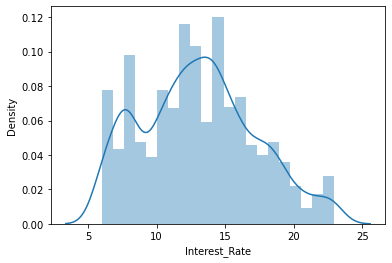

In [47]:
sns.distplot(final_data.Interest_Rate)

C:\Users\javed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

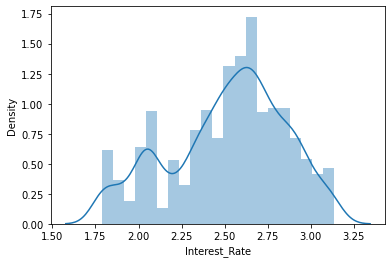

In [48]:
sns.distplot(np.log(final_data.Interest_Rate))

In [49]:
final_data['ln_Interest_Rate'] = np.log(final_data.Interest_Rate)
final_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,ln_Interest_Rate
0,20000.0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,2.494857
2,35000.0,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,9975.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,2.460443


In [50]:
final_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Debt_To_Income_Ratio', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'fico_avg',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_

# linearity

In [51]:
df = final_data.corr()

In [52]:
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,ln_Interest_Rate
Amount_Requested,1.000000,0.970242,0.330780,0.412678,0.082025,0.458647,0.194894,0.342755,-0.022045,0.165058,...,0.011257,0.011139,-0.029010,0.012011,0.038777,-0.004958,-0.025626,-0.011311,-0.026105,0.301991
Amount_Funded_By_Investors,0.970242,1.000000,0.335694,0.406487,0.094015,0.436182,0.185813,0.325537,-0.055287,0.169248,...,0.013417,0.011252,-0.025481,0.011832,0.041394,0.002434,-0.022699,-0.007423,-0.024233,0.302279
Interest_Rate,0.330780,0.335694,1.000000,0.423147,0.173002,0.036206,0.083050,0.083611,0.170408,0.052629,...,-0.027107,0.020980,0.001154,0.010971,0.047906,-0.003071,0.019429,0.019641,0.003906,0.982431
Loan_Length,0.412678,0.406487,0.423147,1.000000,0.025450,0.104451,0.043536,0.080894,0.031553,0.074383,...,-0.021211,-0.034731,-0.030399,0.032825,0.041206,0.021108,0.021928,0.021434,-0.021211,0.386342
Debt_To_Income_Ratio,0.082025,0.094015,0.173002,0.025450,1.000000,-0.169497,0.370845,0.219636,0.012432,0.049184,...,0.008895,0.063498,-0.006585,0.019989,0.034852,0.012063,-0.001499,0.065453,0.020499,0.178772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_WA,-0.004958,0.002434,-0.003071,0.021108,0.012063,-0.019020,-0.010359,-0.006159,-0.003285,0.059860,...,-0.006169,-0.042151,-0.012369,-0.027657,-0.006899,1.000000,-0.015799,-0.011974,-0.006169,-0.003684
State_WI,-0.025626,-0.022699,0.019429,0.021928,-0.001499,-0.019149,0.011376,-0.002998,0.020564,-0.002789,...,-0.004104,-0.028039,-0.008228,-0.018397,-0.004589,-0.015799,1.000000,-0.007965,-0.004104,0.014466
State_WV,-0.011311,-0.007423,0.019641,0.021434,0.065453,-0.032435,0.029833,0.002709,0.025881,-0.018573,...,-0.003110,-0.021250,-0.006235,-0.013943,-0.003478,-0.011974,-0.007965,1.000000,-0.003110,0.019581
State_WY,-0.026105,-0.024233,0.003906,-0.021211,0.020499,-0.009512,0.024671,-0.001296,-0.022318,0.015040,...,-0.001603,-0.010949,-0.003213,-0.007184,-0.001792,-0.006169,-0.004104,-0.003110,1.000000,0.008149


In [53]:
df.loc['Interest_Rate'].sort_values(ascending=False).tail(50)

State_OK                         0.015285
State_KS                         0.013742
State_MS                         0.012492
State_NV                         0.012406
Loan_Purpose_moving              0.012362
State_VA                         0.010971
State_DC                         0.010924
State_MD                         0.009264
Loan_Purpose_house               0.008394
Loan_Purpose_other               0.006913
State_IA                         0.005112
State_WY                         0.003906
State_NY                         0.003283
State_AZ                         0.002980
State_AR                         0.002957
State_UT                         0.001154
State_AL                         0.001140
State_IN                         0.000248
State_RI                        -0.000882
Loan_Purpose_credit_card        -0.001415
State_WA                        -0.003071
State_CO                        -0.005245
State_FL                        -0.005980
State_SC                        -0

In [54]:
Interest_Rate                      1.000000
ln_Interest_Rate                   0.982441
Loan_Length                        0.423200
Amount_Funded_By_Investors         0.335689
Amount_Requested                   0.330793
Debt_To_Income_Ratio               0.173116
Inquiries_in_the_Last_6_Months     0.169591
Loan_Purpose_debt_consolidation    0.130267
Revolving_CREDIT_Balance           0.083399
Open_CREDIT_Lines                  0.083094
Loan_Purpose_home_improvement   -0.088661
Loan_Purpose_major_purchase     -0.111582
fico_avg                        -0.712299


SyntaxError: invalid syntax (<ipython-input-54-f1d52f5319d5>, line 1)

In [55]:
cor = '''Loan_Length
Amount_Requested
Debt_To_Income_Ratio
Inquiries_in_the_Last_6_Months
Loan_Purpose_debt_consolidation
State_RENT
Revolving_CREDIT_Balance
Loan_Purpose_home_improvement
Loan_Purpose_major_purchase
fico_avg'''
cor_var = cor.split()
cor_var

['Loan_Length',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'State_RENT',
 'Revolving_CREDIT_Balance',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'fico_avg']

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Feature Selection
    1. RFE - Recurssive Feature Elimination
    2. univariate regression : F-Regression # Feature Selection based on importance
    3. VIF - Variance Inflation factor

# RFE - Recurssive Feature Elimination

VVVVVVVViiii.....

RFE
Y   100 X variables

Y~X1+X2+X3+…X100                        
(it will drop most insignificant variable)


     X22 is most insignificant variable(let this var is most insignificant variable)
     
     99 variables   (you left with 99 var)
     
Perform regression with 99 variables      

X39 the most insignficant(dropped)

98 variables
Perform regression with 98 variables



after 85 iterations


top 15 variables


Condition : there should not Multicollinearity 
Therefore we use Random Forest technique to perform RFE as random Forest in not effected by multicollinearity. 

In [57]:
Feature_X = final_data[final_data.columns.difference( ['ln_Interest_Rate', 'Interest_Rate'] )]
Feature_X.columns

Index(['Amount_Funded_By_Investors', 'Amount_Requested',
       'Debt_To_Income_Ratio', 'Employment_Length', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',


In [58]:
['State_RENT', 'Loan_Purpose_home_improvementLoan_Purpose_major_purchase', 'Home_Ownership_MI', 'Home_Ownership_HI']

['State_RENT',
 'Loan_Purpose_home_improvementLoan_Purpose_major_purchase',
 'Home_Ownership_MI',
 'Home_Ownership_HI']

In [59]:
final_data.shape

(2500, 74)

In [60]:
target_Y = final_data.ln_Interest_Rate

In [62]:
Feature_X

,Amount_Funded_By_Investors,Amount_Requested,Debt_To_Income_Ratio,Employment_Length,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Inquiries_in_the_Last_6_Months,Loan_Length,...,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,fico_avg
0,20000.00,20000.0,14.90,1.0,0,0,0,0,2.0,36.0,...,0,0,0,0,0,0,0,0,0,737.0
1,19200.00,19200.0,28.36,2.0,0,0,0,0,1.0,36.0,...,0,1,0,0,0,0,0,0,0,717.0
2,35000.00,35000.0,23.81,2.0,0,0,0,0,1.0,60.0,...,0,0,0,0,0,0,0,0,0,692.0
3,9975.00,10000.0,14.30,5.0,0,0,0,0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,697.0
4,12000.00,12000.0,18.78,9.0,0,0,0,1,0.0,36.0,...,0,0,0,0,0,0,0,0,0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,29950.00,30000.0,19.23,8.0,0,0,0,0,1.0,60.0,...,0,0,0,0,0,0,0,0,0,707.0
2496,16000.00,16000.0,21.54,10.0,0,0,1,0,1.0,60.0,...,0,0,0,0,0,0,0,0,0,742.0
2497,10000.00,10000.0,4.89,10.0,0,0,0,0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,682.0
2498,6000.00,6000.0,16.66,5.0,0,0,0,1,0.0,36.0,...,0,0,0,0,0,0,0,0,0,677.0


In [67]:
from sklearn.feature_selection import RFE


In [68]:
from sklearn.linear_model import LinearRegression

In [72]:
rfe_reg = RFE(LinearRegression(),n_features_to_select = 10)
rfe_reg.fit(Feature_X,target_Y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [73]:
#Feature_X.columns[rfe_reg.support_]

In [74]:
rfe_var = Feature_X.columns[rfe_reg.support_]

In [75]:
rfe_var

Index(['Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_house',
       'Loan_Purpose_moving', 'Loan_Purpose_other', 'State_HI', 'State_MT',
       'State_SD', 'State_VT'],
      dtype='object')

In [76]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=12)
rfe = rfe.fit(Feature_X,target_Y)

In [77]:
Feature_X.columns[rfe.support_]

Index(['Amount_Funded_By_Investors', 'Amount_Requested',
       'Debt_To_Income_Ratio', 'Employment_Length', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_TX',
       'fico_avg'],
      dtype='object')

In [78]:
RandomForest_RFE_var =['Amount_Funded_By_Investors', 'Amount_Requested',
       'Debt_To_Income_Ratio', 'Employment_Length',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_debt_consolidation', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_TX',
       'fico_avg','Home_Ownership_RENT']

In [79]:
RandomForest_RFE_var

['Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Employment_Length',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Monthly_Income',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_TX',
 'fico_avg',
 'Home_Ownership_RENT']

# F- Regression

In [80]:
from sklearn.feature_selection import f_regression

In [81]:
F_values, p_values = f_regression(Feature_X,target_Y)

In [82]:
F_values

array([2.51201192e+02, 2.50674653e+02, 8.24699064e+01, 3.24654802e+00,
       2.29603005e+00, 2.62865846e+00, 4.71656492e-01, 1.86167622e+01,
       8.11937401e+01, 4.38267854e+02, 6.38051931e-02, 4.53726616e+01,
       3.36416285e+00, 2.40975974e+01, 2.52433744e-02, 3.16249583e+01,
       5.12191332e+00, 2.28115373e-01, 1.53763763e-01, 2.48603541e+00,
       3.18810291e-01, 1.57692090e+00, 1.76830111e+00, 5.06966626e-01,
       1.17181882e+01, 1.60049914e+01, 2.59978113e-03, 7.02365347e-02,
       1.76650798e-01, 2.58188753e-02, 2.73831235e-02, 9.98895925e-01,
       1.62506017e-01, 5.15208715e-01, 1.70134256e-01, 1.68426979e+00,
       4.92284444e+00, 1.53572414e-01, 1.30627695e+00, 2.28239852e-02,
       5.36605717e-01, 4.98805770e-01, 3.63210792e+00, 6.02318478e-01,
       5.52931303e-02, 6.40563614e+00, 1.00104919e+00, 2.90398801e-01,
       4.86379571e-01, 2.42017348e+00, 8.24289039e-01, 1.52135002e+00,
       2.60345981e-01, 1.16046979e+00, 3.46493203e-01, 3.93646651e-04,
      

In [83]:
p_values

array([5.55884139e-54, 7.06795949e-54, 2.12246825e-19, 7.16945719e-02,
       1.29831658e-01, 1.05076560e-01, 4.92289837e-01, 1.66025025e-05,
       3.96614065e-19, 8.53692410e-90, 8.00600510e-01, 2.01456973e-11,
       6.67483269e-02, 9.74776318e-07, 8.73774972e-01, 2.07811796e-08,
       2.37110423e-02, 6.32966573e-01, 6.94997662e-01, 1.14987359e-01,
       5.72374192e-01, 2.09322213e-01, 1.83713879e-01, 4.76521428e-01,
       6.28892755e-04, 6.50121839e-05, 9.59339120e-01, 7.91014563e-01,
       6.74303582e-01, 8.72356443e-01, 8.68580786e-01, 3.17674612e-01,
       6.86894190e-01, 4.72959813e-01, 6.80027913e-01, 1.94477886e-01,
       2.65934120e-02, 6.95177972e-01, 2.53179368e-01, 8.79927891e-01,
       4.63911568e-01, 4.80091191e-01, 5.67896725e-02, 4.37768258e-01,
       8.14115534e-01, 1.14367665e-02, 3.17153676e-01, 5.90013103e-01,
       4.85611657e-01, 1.19908341e-01, 3.64016705e-01, 2.17531356e-01,
       6.09927642e-01, 2.81472151e-01, 5.56158207e-01, 9.84172170e-01,
      

In [84]:
freg_result = pd.concat([pd.Series(Feature_X.columns),pd.Series(F_values),pd.Series(p_values)],axis = 1)

In [85]:
freg_result.columns = ['variables','f_value', 'p_value']

In [86]:
freg_result.sort_values(by = 'f_value',ascending = False, inplace = True)

In [87]:
freg_var = freg_result.variables.head(15).tolist()
freg_var

['fico_avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'State_MI',
 'Loan_Purpose_medical',
 'State_HI']

In [88]:
RandomForest_RFE_var

['Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Employment_Length',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Monthly_Income',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_TX',
 'fico_avg',
 'Home_Ownership_RENT']

In [89]:
cor_var

['Loan_Length',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'State_RENT',
 'Revolving_CREDIT_Balance',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'fico_avg']

In [90]:
set = {'Loan_Length',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'State_RENT',
 'Revolving_CREDIT_Balance',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'fico_avg','Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Employment_Length',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Monthly_Income',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_TX',
 'fico_avg',
 'Home_Ownership_RENT','fico_avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'State_MI',
 'Loan_Purpose_medical',
 'State_HI'
       
      }

In [91]:
set

{'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Employment_Length',
 'Home_Ownership_RENT',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_medical',
 'Monthly_Income',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_HI',
 'State_MI',
 'State_RENT',
 'State_TX',
 'fico_avg'}

# Based on Multicollinearity feature Reduction
     
     correlation Matrix(Bivariate Relationship- collinearity)
     VIF- Variance Inflation Factor
     PCA - Principle Component analysis.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
final_list = ['fico_avg',
#'Loan_Length',
# 'Amount_Requested',
'Amount_Funded_By_Investors',
 #'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
#'Loan_Purpose_debt_consolidation',
#'Loan_Purpose_home_improvement',
 #'Loan_Purpose_major_purchase',
 #'Loan_Purpose_medical',
# 'State_TX',
# 'State_HI',
# 'State_MI',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
#'Home_Ownership_RENT',
#'Employment_Length',
#'Monthly_Income',
             ]

In [94]:
feature_x = Feature_X[final_list]
feature_x

,fico_avg,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,Revolving_CREDIT_Balance
0,737.0,20000.00,2.0,14272.0
1,717.0,19200.00,1.0,11140.0
2,692.0,35000.00,1.0,21977.0
3,697.0,9975.00,0.0,9346.0
4,697.0,12000.00,0.0,14469.0
...,...,...,...,...
2495,707.0,29950.00,1.0,45880.0
2496,742.0,16000.00,1.0,18898.0
2497,682.0,10000.00,0.0,4544.0
2498,677.0,6000.00,0.0,7753.0


# performing linear regression considering zeroth varialbe as target and rest as dependent variable.

that is 

fico_avg ~ 'Loan_Length','Amount_Requested','Debt_To_Income_Ratio','Inquiries_in_the_Last_6_Months','Loan_Purpose_debt_consolidation',
 'Loan_Purpose_home_improvement','Loan_Purpose_major_purchase',
 'Loan_Purpose_medical','State_TX','State_HI','State_MI', 'Revolving_CREDIT_Balance', 'Open_CREDIT_Lines', 'Home_Ownership_RENT',
 'Employment_Length', 'Monthly_Income',
             ]



In [95]:
variance_inflation_factor(feature_x.values, 0) 

4.4024506899616975

In [96]:
feature_x.shape

(2500, 4)

In [97]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(feature_x.values, i) for i in range(feature_x.shape[1])]
vif["features"] = feature_x.columns

In [98]:
vif.sort_values(by='VIF_Factor', ascending=False)
vif

,VIF_Factor,features
0,4.402451,fico_avg
1,3.845539,Amount_Funded_By_Investors
2,1.593668,Inquiries_in_the_Last_6_Months
3,2.232855,Revolving_CREDIT_Balance


In [99]:
final_data1 = pd.concat([feature_x,target_Y],axis = 1)

# Data Prepration 4 - Train test split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
train,test = train_test_split(final_data1,test_size = 0.3,random_state = 123)

In [102]:
import statsmodels.formula.api as smf

In [103]:
feature_x

,fico_avg,Amount_Funded_By_Investors,Inquiries_in_the_Last_6_Months,Revolving_CREDIT_Balance
0,737.0,20000.00,2.0,14272.0
1,717.0,19200.00,1.0,11140.0
2,692.0,35000.00,1.0,21977.0
3,697.0,9975.00,0.0,9346.0
4,697.0,12000.00,0.0,14469.0
...,...,...,...,...
2495,707.0,29950.00,1.0,45880.0
2496,742.0,16000.00,1.0,18898.0
2497,682.0,10000.00,0.0,4544.0
2498,677.0,6000.00,0.0,7753.0


In [104]:
'ln_Interest_Rate ~'  + '+'.join(feature_x.columns)

'ln_Interest_Rate ~fico_avg+Amount_Funded_By_Investors+Inquiries_in_the_Last_6_Months+Revolving_CREDIT_Balance'

In [105]:
formula = 'ln_Interest_Rate ~'  + '+'.join(feature_x.columns)

In [106]:
#formula = 'ln_Interest_Rate ~fico_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation'

In [107]:
model = smf.ols(formula,data=train)

In [108]:
model_output = model.fit()

In [109]:
print(model_output.summary()) 

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1052.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:20:00   Log-Likelihood:                 481.44
No. Observations:                1750   AIC:                            -952.9
Df Residuals:                    1745   BIC:                            -925.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [110]:
train_pred = np.exp(model_output.predict(train))
test_pred = np.exp(model_output.predict(test))

In [111]:
train_actual = np.exp(train.ln_Interest_Rate)
test_actual = np.exp(test.ln_Interest_Rate)

In [112]:
test_actual

2386    12.690
1298     5.984
1995     8.880
2097    15.050
289     10.360
         ...  
265     20.500
182     12.690
899     14.590
1927    11.360
846     17.270
Name: ln_Interest_Rate, Length: 750, dtype: float64

In [113]:
train_RMSE = np.sqrt(np.mean(np.square(train_actual-train_pred)))
test_RMSE =np.sqrt(np.mean(np.square(test_actual-test_pred)))

In [114]:
train_RMSE

2.2455161805149455

In [115]:
test_RMSE

2.2914710389754176

In [116]:
train_RMSPE =np.sqrt(np.mean( np.square((train_actual - train_pred)/train_actual)))
test_RMSPE = np.sqrt(np.mean(np.square((test_actual-test_pred)/test_actual)))

In [117]:
train_RMSPE

0.18902832591976912

In [118]:
test_RMSPE

0.1930749314240077

In [119]:
train_MAPE = np.mean(np.abs((train_actual - train_pred)/train_actual))
test_MAPE = np.mean(np.abs((test_actual-test_pred)/test_actual))

In [120]:
train_MAPE

0.14378926236632447

In [121]:
test_MAPE

0.14716480661250692

In [122]:
#find the optimum rspe mape ramspe

# Correlation coefficient 

It tells that 

If rate of intrest is high , and predicted value also high or not
If rate of intrest is low , and predicted value also low or not

predected value should be close to actual value .

NOte : Correlation coefficient  tells us on whole data level

In [123]:
np.corrcoef(train_actual,train_pred)

array([[1.        , 0.84209235],
       [0.84209235, 1.        ]])

In [124]:
np.corrcoef(test_actual,test_pred)

array([[1.       , 0.8361737],
       [0.8361737, 1.       ]])

In [125]:
train_errors = train_actual - train_pred
test_errors = test_actual - test_pred

<AxesSubplot:ylabel='Count'>

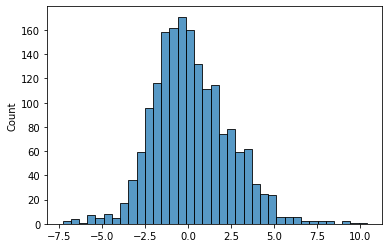

In [126]:
sns.histplot(train_errors)

<AxesSubplot:ylabel='Count'>

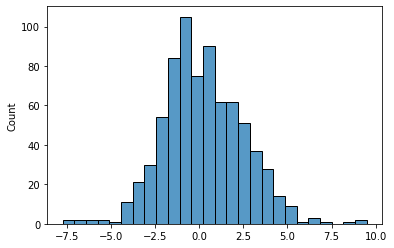

In [127]:
sns.histplot(test_errors)